In [155]:
import numpy as np 
import pandas as pd 
import pylab as plt
import mview

In [156]:
data = pd.read_csv("food_comp_processed.csv")
data.head()

,Unnamed: 0,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),class
0,0,"CHEESE,COTTAGE,CRMD,LRG OR SML CURD",79.79,98,11.12,4.30,1.41,3.38,0.0,2.67,...,0,0.08,0.1,3,0.0,1.718,0.778,0.123,17,2
1,1,"CHEESE,COTTAGE,CRMD,W/FRUIT",79.64,97,10.69,3.85,1.20,4.61,0.2,2.38,...,0,0.04,0.0,0,0.4,2.311,1.036,0.124,13,2
2,2,"CHEESE,COTTAGE,NONFAT,UNCRMD,DRY,LRG OR SML CURD",81.01,72,10.34,0.29,1.71,6.66,0.0,1.85,...,0,0.01,0.0,0,0.0,0.169,0.079,0.003,7,2
3,3,"CHEESE,COTTAGE,LOWFAT,2% MILKFAT",81.24,81,10.45,2.27,1.27,4.76,0.0,4.00,...,0,0.08,0.0,0,0.0,1.235,0.516,0.083,12,2
4,4,"CHEESE,COTTAGE,LOWFAT,1% MILKFAT",82.48,72,12.39,1.02,1.39,2.72,0.0,2.72,...,0,0.01,0.0,0,0.1,0.645,0.291,0.031,4,2


In [157]:
tab10 = {0: "tab:blue", 
        1: "tab:orange",
        2: "tab:green",
        3: "tab:red",
        4: "tab:purple"}

In [158]:
from sklearn.cluster import KMeans


labels = data[['Shrt_Desc']].to_numpy()
shrt_labels = np.array([str(lbl) for lbl in labels])


x1 = data[['Water_(g)','Vit_E_(mg)','Sodium_(mg)','Lipid_Tot_(g)','Energ_Kcal']].to_numpy()
x2 = data[['Protein_(g)', 'Vit_B6_(mg)', 'Vit_B12_(µg)', 'Vit_D_µg']].to_numpy()
x3 = data[['Vit_C_(mg)', 'Vit_A_IU', 'Beta_Carot']].to_numpy()
X = data.drop(['Unnamed: 0', "Shrt_Desc"],axis=1).to_numpy()

C = KMeans(3).fit_predict(X / np.max(X,axis=0))


In [159]:
keep_labels = [
    "TURKEY,WHL,MEAT ONLY,RAW",
    "SOUP,CHICK BROTH,CND,COND",
    "TOFU,FIRM,PREP W/CA SULFATE&MAGNESIUM CHLORIDE (NIGARI)",
    "BEVERAGES,H2O,TAP,DRINKING",
    "RESTAURANT,CHINESE,VEG LO MEIN,WO/ MEAT",
    "BEEF,CHUCK FOR STEW,LN & FAT,ALL GRDS,RAW",
    "POTATOES,BKD,FLESH,W/SALT",
    "BEANS,KIDNEY,RED,MATURE SEEDS,CND,SOL & LIQUIDS"
]
labels = labels.reshape(-1)
idx = list()
for i,l in enumerate(labels):
    if l in keep_labels: idx.append(i)

shrt_labels = [l[2:10] if i in idx else "" for i,l in enumerate(shrt_labels)]


In [160]:
x1 /= np.max(x1,axis=0)
x2 /= np.max(x2,axis=0)
x3 /= np.max(x3,axis=0)

In [161]:
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
x1 = pairwise_distances(x1)
x2 = pairwise_distances(x2)

avg = (x1+x2)/2
init = PCA(n_components=3).fit_transform(avg)

In [162]:
proj1 = np.array([[1,0,0],
                  [0,1,0]])
proj2 = np.array([[0,1,0],
                  [0,0,1]])                 
proj3 = np.array([[0,0,1],
                  [1,0,0]])                   

In [163]:
cluster_map = {i: c for i, c in enumerate(C)}
clusters = [list() for _ in range(3)]
for i,l in enumerate(shrt_labels):
    clusters[cluster_map[i]].append(l)

df = pd.DataFrame(clusters)


In [171]:
mv = mview.mpse_tsne([x1,x2],perplexity=400,
                    iters=500, smart_init=True,
                    show_plots=False,initial_projections=[proj1,proj2],
                    initial_embedding=init,save_results=True)


(948, 948)
(948, 948)
len 1
len 1


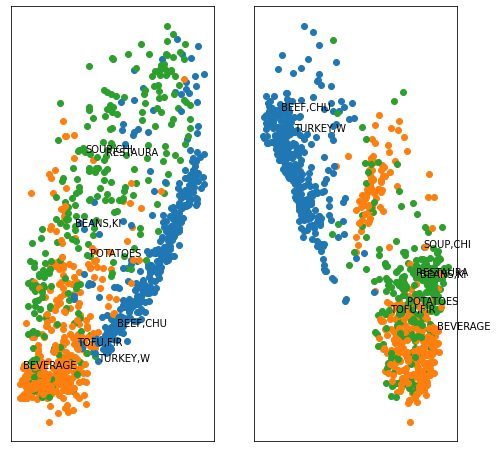

In [172]:
fig, (ax1,ax2) = plt.subplots(1,2)
y1 = mv.images[0,:,:]
y2 = mv.images[1,:,:]
m = ['^', 'o']
for ax,emb in zip([ax1,ax2],[y1,y2]):
    x , y = emb[:,0], emb[:,1]
    for px,py,c,txt in zip(x,y, C,shrt_labels):
        ax.scatter(px,py,c=tab10[c], alpha=1)
        ax.text(px,py,txt,)
    ax.set_xticks([])
    ax.set_yticks([])

fig.set_size_inches(8,8)
# fig.tight_layout()

c:\Users\mill288\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


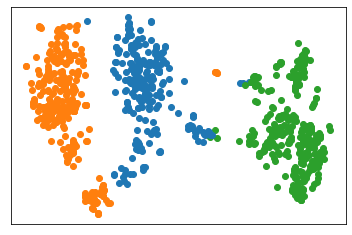

In [65]:
from sklearn.manifold import TSNE
Y = TSNE(perplexity=160,init='pca',learning_rate='auto').fit_transform(X / np.max(X,axis=0))
#Y = PCA(2).fit_transform(X / np.max(X,axis=0))

fig, ax = plt.subplots()
for x,y, c in zip(Y[:,0],Y[:,1],C):
    ax.scatter(x,y,c=tab10[c])
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("figs/better-food-tsne.png")

c:\Users\mill288\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


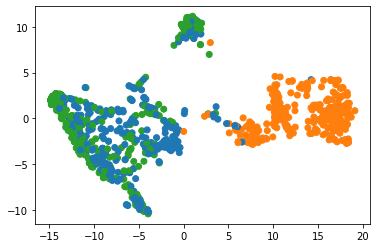

In [154]:
from sklearn.manifold import TSNE
Y = TSNE(perplexity=120,learning_rate='auto',init='pca').fit_transform(x2)

C1 = [tab10[c] for c in C]
plt.scatter(Y[:,0],Y[:,1],c=C1)